# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [2]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


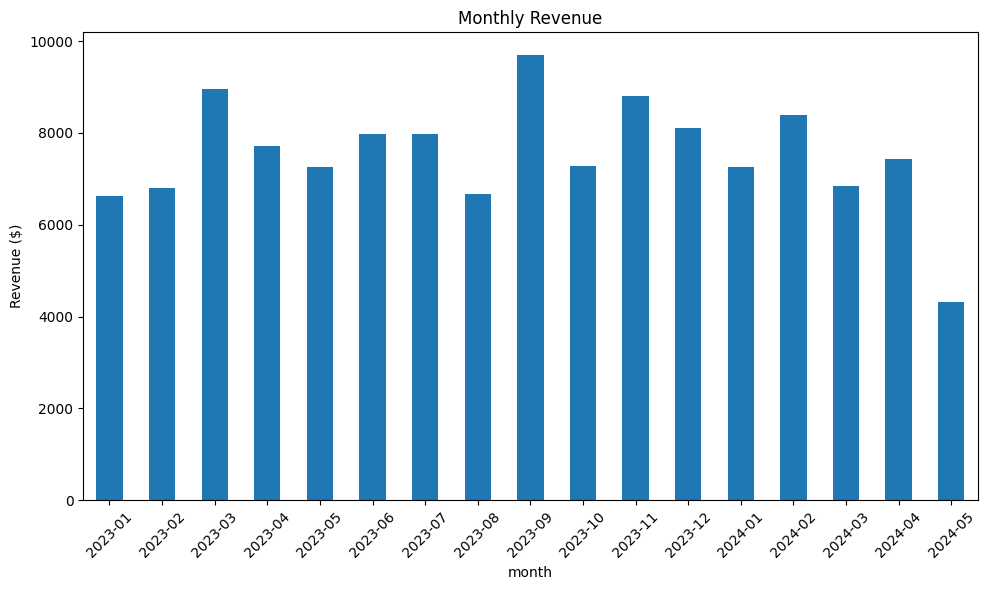

In [3]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

In [5]:
# Your code here
# Determine the last quarter
latest_date = data["order_date"].max()
latest_quarter = latest_date.to_period("Q")
all_quarters = data["order_date"].dt.to_period("Q").unique()
all_quarters = sorted(all_quarters)
last_full_quarter = all_quarters[-2] if latest_quarter not in data[data["order_date"].dt.to_period("Q") == latest_quarter]["month"].unique() else latest_quarter

# Filter data for the last full quarter
last_quarter_data = data[data["order_date"].dt.to_period("Q") == last_full_quarter]

# Group by month and sum revenue
revenue_by_month = last_quarter_data.groupby("month")["revenue"].sum().reset_index()

# Calculate total revenue for that quarter
total_revenue_quarter = revenue_by_month["revenue"].sum()

print("Revenue by Month (Last Full Quarter):")
print(revenue_by_month)
print(f"\nTotal Revenue for {last_full_quarter}: ${total_revenue_quarter:,.2f}")


Revenue by Month (Last Full Quarter):
     month  revenue
0  2024-01  7268.59
1  2024-02  8388.91
2  2024-03  6835.73

Total Revenue for 2024Q1: $22,493.23


### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

In [6]:
# Your code here
# Calculate total revenue per customer
customer_revenue = data.groupby("customer_id")["revenue"].sum().reset_index()

# Sort in descending order and get top 5
top5_customers = customer_revenue.sort_values(by="revenue", ascending=False).head(5)

print("Top 5 Customers by Total Revenue:")
print(top5_customers)

Top 5 Customers by Total Revenue:
    customer_id  revenue
60           62  4448.39
22           24  3369.44
88           90  2976.78
90           92  2838.74
95           97  2835.62


### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

In [7]:
# Your code here
# Calculate average spending per order for each customer segment
avg_spend_segment = data.groupby("customer_segment")["revenue"].mean().reset_index()

# Sort from highest to lowest
avg_spend_segment = avg_spend_segment.sort_values(by="revenue", ascending=False)

print("Average Revenue per Order by Customer Segment:")
print(avg_spend_segment)

Average Revenue per Order by Customer Segment:
  customer_segment     revenue
1           Senior  262.133925
0     Professional  255.652674
2          Student  253.812087


### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

In [8]:
# Your code here
# Total revenue by region
region_revenue = data.groupby("region")["revenue"].sum().reset_index().sort_values(by="revenue", ascending=False)

# Average order size (mean revenue per order) by region
region_avg_order = data.groupby("region")["revenue"].mean().reset_index().sort_values(by="revenue", ascending=False)

print("Total Revenue by Region:")
print(region_revenue)

print("\nAverage Order Size by Region:")
print(region_avg_order)


Total Revenue by Region:
  region   revenue
2  South  34839.45
1  North  34351.69
0   East  31221.80
3   West  27727.73

Average Order Size by Region:
  region     revenue
2  South  274.326378
1  North  258.283383
3   West  252.070273
0   East  240.167692


### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

In [9]:
# Your code here
# Most popular product category by total quantity sold
category_quantity = data.groupby("product_category")["quantity"].sum().reset_index().sort_values(by="quantity", ascending=False)

# Most popular product category by total revenue
category_revenue = data.groupby("product_category")["revenue"].sum().reset_index().sort_values(by="revenue", ascending=False)

print("Most Popular Product Categories by Quantity Sold:")
print(category_quantity)

print("\nMost Popular Product Categories by Total Revenue:")
print(category_revenue)

Most Popular Product Categories by Quantity Sold:
  product_category  quantity
3             Home       269
1         Clothing       253
4           Sports       246
2      Electronics       239
0            Books       227

Most Popular Product Categories by Total Revenue:
  product_category   revenue
3             Home  29871.47
2      Electronics  25498.31
1         Clothing  24804.57
0            Books  24046.06
4           Sports  23920.26


### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

In [12]:
# Your code here
# Compare discounted vs non-discounted orders
data["is_discounted"] = np.where(data["discount_applied"] > 0, "Discounted", "Non-Discounted")

# Calculate average revenue per order for each group
revenue_comparison = data.groupby("is_discounted")["revenue"].mean().reset_index()

# Identify which group generates more
higher_group = revenue_comparison.loc[revenue_comparison["revenue"].idxmax(), "is_discounted"]
higher_value = revenue_comparison["revenue"].max()

print("Average Revenue per Order:")
print(revenue_comparison)
print(f"\n The '{higher_group}' orders generate higher average revenue per order (${higher_value:,.2f}).")


Average Revenue per Order:
    is_discounted     revenue
0      Discounted  263.831362
1  Non-Discounted  248.296337

 The 'Discounted' orders generate higher average revenue per order ($263.83).


### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

In [13]:
# Your code here
# Percentage of orders by payment method
payment_percent = (
    data["payment_method"].value_counts(normalize=True) * 100
).reset_index()
payment_percent.columns = ["payment_method", "percentage"]

# Average revenue per order by payment method
avg_revenue_payment = (
    data.groupby("payment_method")["revenue"].mean().reset_index().sort_values(by="revenue", ascending=False)
)

# Identify the highest-spending payment method
top_payment = avg_revenue_payment.loc[avg_revenue_payment["revenue"].idxmax(), "payment_method"]
top_value = avg_revenue_payment["revenue"].max()

print("Percentage of Orders by Payment Method:")
print(payment_percent)

print("\nAverage Revenue per Order by Payment Method:")
print(avg_revenue_payment)

print(f"\n Customers using '{top_payment}' tend to spend the most on average (${top_value:,.2f} per order).")


Percentage of Orders by Payment Method:
  payment_method  percentage
0    Credit Card        27.4
1      Gift Card        24.8
2     Debit Card        24.6
3         PayPal        23.2

Average Revenue per Order by Payment Method:
  payment_method     revenue
1     Debit Card  275.980650
0    Credit Card  257.444234
2      Gift Card  254.362500
3         PayPal  236.071034

 Customers using 'Debit Card' tend to spend the most on average ($275.98 per order).


### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

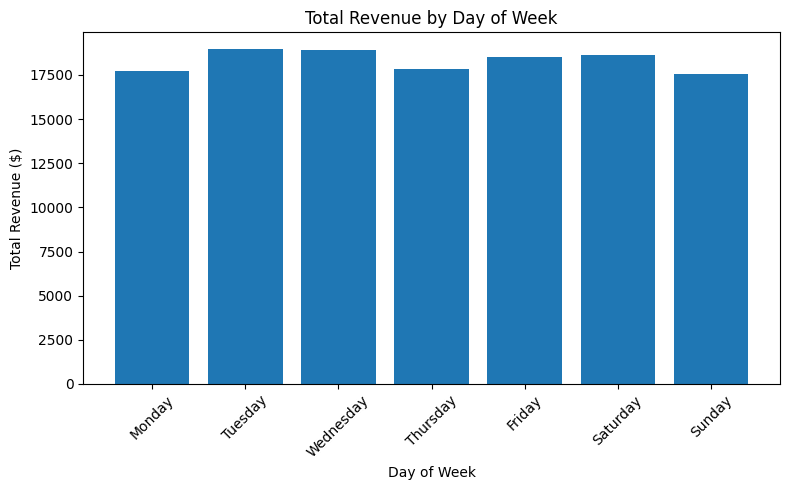

 Weekdays are busier, with total revenue of $91,950.08 vs $36,190.59 on weekends.


In [14]:
# Your code here
# Calculate total revenue by day of week
revenue_by_day = (
    data.groupby("day_of_week")["revenue"]
    .sum()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
    .reset_index()
)

# Plot revenue by day of week
plt.figure(figsize=(8,5))
plt.bar(revenue_by_day["day_of_week"], revenue_by_day["revenue"])
plt.title("Total Revenue by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Compare weekend vs weekday totals
weekend_days = ["Saturday", "Sunday"]
weekend_revenue = revenue_by_day[revenue_by_day["day_of_week"].isin(weekend_days)]["revenue"].sum()
weekday_revenue = revenue_by_day[~revenue_by_day["day_of_week"].isin(weekend_days)]["revenue"].sum()

if weekend_revenue > weekday_revenue:
    print(f" Weekends are busier, with total revenue of ${weekend_revenue:,.2f} vs ${weekday_revenue:,.2f} on weekdays.")
else:
    print(f" Weekdays are busier, with total revenue of ${weekday_revenue:,.2f} vs ${weekend_revenue:,.2f} on weekends.")


### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

In [15]:
# Your code here
data["profit"] = data["revenue"] * 0.20

# Calculate total profit
total_profit = data["profit"].sum()

# Calculate total profit by region
profit_by_region = (
    data.groupby("region")["profit"]
    .sum()
    .reset_index()
    .sort_values(by="profit", ascending=False)
)

# Identify most profitable region
top_region = profit_by_region.loc[profit_by_region["profit"].idxmax(), "region"]
top_profit = profit_by_region["profit"].max()

print(f"Estimated Total Profit: ${total_profit:,.2f}\n")
print("Profit by Region:")
print(profit_by_region)
print(f"\n The most profitable region is '{top_region}' with an estimated profit of ${top_profit:,.2f}.")

Estimated Total Profit: $25,628.13

Profit by Region:
  region    profit
2  South  6967.890
1  North  6870.338
0   East  6244.360
3   West  5545.546

 The most profitable region is 'South' with an estimated profit of $6,967.89.


### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

**Your recommendation here:**

Write your analysis and recommendation based on the insights you discovered from the data.

In [ ]:
# Analysis:
# The company revenue is very different each month, resulting in some quarters having a higher revenue than others. 
# A small group of customers contributes the most to the total revenue.
# The South region generates the most revenue and profit.
# While Home and Clothing are sold the most by quantity, Electronics generate the highest revenue. 
# The discounted orders produce more revenue than the non-discounted orders because people tend to purchase more when item is discounted.

# Business Recommendation:
# We should focus our marketing efforts in sectors that generate the most profit such as:
#   Advertising to the customers that generate the highest revenue.
#   Launching promotional offers and marketing campaigns in the South region becuase it generates most profit.
#   Promote the Electronics category since it has a high-level profit margin compared to others.
# We should follow the above efforts and focus on the top-revenue/profit segments to increase total profit and lead to long-term business growth.

---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.